In [3]:
# Este comando "limpia" todas las variables definidas (equivalente a "clear all" de Matlab)
%reset_selective -f b

# Este comando le indica a Python que las figuras se deben generar dentro de la misma Notebook, no en una ventana
%matplotlib inline

# Importamos las librerías

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy.ma as ma
import scipy.io as sio
import matplotlib
import glob
import matplotlib.cm as cm






# Cargamos los mapas a utilizar
mapa = sio.loadmat('/home/martin/Escritorio/Casosdeestudiosensoramiento/data/mapas.mat')

# Vamos a cargar las matrices de latitud y longitud desde el archivo .dat en la carpeta "data"

filename = '/home/martin/Escritorio/Casosdeestudiosensoramiento/data/fdisk_latlon_2km.dat'

with open(filename, 'rb') as f:

    data = np.fromfile(f, dtype='<f4')
    array = np.reshape(data, [5424,5424,2], order='F')
    

    
    # Esta grilla corresponde al "full-disk", por lo tanto vamos a recortar un sector para disminuir el volumen de datos

latsat=array[:,:,0][3440:3790,3400:3680] # Estos índices corresponden al sector de Argentina, 
lonsat=array[:,:,1][3440:3790,3400:3680]  # si desean trabajar en otra región deberán modificarlos a su conveniencia.


latsat = ma.masked_where(latsat==-999.0,latsat)
lonsat = ma.masked_where(lonsat==-999.0,lonsat)

print 'latitud máxima: ', np.max(latsat)
print 'latitud mínima: ', np.min(latsat)

print 'longitud máxima: ', np.max(lonsat)
print 'longitud mínima: ', np.min(lonsat)

print
# Abrimos el archivo Netcdf "ABI L2 Cloud and Moisture Imagery: Multi-Band Format" y extraemos las bandas deseadas
#leemos para ver si la carpeta contiene un netcdf
g=glob.glob('/home/martin/Escritorio/Casosdeestudiosensoramiento/*.nc')

print g



latitud máxima:  -12.6955
latitud mínima:  -18.2035
longitud máxima:  -68.1296
longitud mínima:  -75.7935

['/home/martin/Escritorio/Casosdeestudiosensoramiento/OR_ABI-L2-MCMIPF-M3_G16_s20172701100450_e20172701111223_c20172701111305.nc', '/home/martin/Escritorio/Casosdeestudiosensoramiento/OR_ABI-L2-MCMIPF-M3_G16_s20172530045358_e20172530056125_c20172530056214.nc', '/home/martin/Escritorio/Casosdeestudiosensoramiento/OR_ABI-L2-MCMIPF-M3_G16_s20172421715360_e20172421726132_c20172421726216.nc', '/home/martin/Escritorio/Casosdeestudiosensoramiento/OR_ABI-L2-MCMIPF-M3_G16_s20172701400451_e20172701411218_c20172701411313.nc']


In [31]:
# Abrimos el archivo Netcdf "ABI L2 Cloud and Moisture Imagery: Multi-Band Format" y extraemos las bandas deseadas


nc = Dataset('/home/martin/Escritorio/Casosdeestudiosensoramiento/OR_ABI-L2-MCMIPF-M3_G16_s20172530045358_e20172530056125_c20172530056214.nc','r')

#CMI_C01   Azul 0,47 micrones (NO se usa)
#CMI_C02  Rojo 0,64 (SI e usa)
#CMI_C03   Vegetacion 0,86(Si se usa)
#CMI_C04   Banda cirrus 1,37 (No se usa)
#CMI_C05   Banda Hielo 1,61 (No se usa)
#CMI_C06   Banda Tamaño de particulas nubosas 2,2 (No se usa)
#CMI_C07   Ventana Corta IR 3,9 (Si se usa)
#CMI_C08   Vapor de agua de niveles altos WV 6,2 (SI se usa)
#CMI_C09   Vapor de agua de niveles medios WV 6,9 (Si se usa)
#CMI_C10   Vapor de agua de niveles bajos/SO2  7,3 (Si Se usa)
#CMI_C11   Topes nubosos 8,4 (si se usa)
#CMI_C12   O3 9,6 (si se usa)
#CMI_C13   Banda limpia IR Onda Larga 10,3 (si se usa)
#CMI_C14   Ventana de radiacion 11,2 (no se usa)
#CMI_C15   Ventana Sucia 12,3 (si se usa)
#CMI_C16   C02 13,3 (si se usa)



#Tomamos las temperaturas de brillo de los archivos


#Tomamos las temperaturas de brillo de los archivos

#Tb_01 = nc.variables['CMI_C01'][:] # Extraemos por ejemplo la banda 1 
Tb_02 = nc.variables['CMI_C02'][:] # Extraemos por ejemplo la banda 2 
Tb_03 = nc.variables['CMI_C03'][:] # Extraemos por ejemplo la banda 3 
#Tb_04 = nc.variables['CMI_C04'][:] # Extraemos por ejemplo la banda 4 
#Tb_05 = nc.variables['CMI_C05'][:] # Extraemos por ejemplo la banda 5 
#Tb_06 = nc.variables['CMI_C06'][:] # Extraemos por ejemplo la banda 6
Tb_07 = nc.variables['CMI_C07'][:] # Extraemos por ejemplo la banda 7 
Tb_08 = nc.variables['CMI_C08'][:] # Extraemos por ejemplo la banda 8 
Tb_09 = nc.variables['CMI_C09'][:] # Extraemos por ejemplo la banda 9 
Tb_10 = nc.variables['CMI_C10'][:] # Extraemos por ejemplo la banda 10 
Tb_11 = nc.variables['CMI_C11'][:] # Extraemos por ejemplo la banda 11 
Tb_12=  nc.variables['CMI_C12'][:] # Extraemos por ejemplo la banda 12 
Tb_13 = nc.variables['CMI_C13'][:] # Extraemos por ejemplo la banda 13 
#Tb_14 = nc.variables['CMI_C14'][:] # Extraemos por ejemplo la banda 14 
Tb_15 = nc.variables['CMI_C15'][:] # Extraemos por ejemplo la banda 15 
Tb_16 = nc.variables['CMI_C16'][:] # Extraemos por ejemplo la banda 16 

nc.close()

# Para poder graficar los datos, es necesario transponer las matrices

Tb_02 =  np.transpose(Tb_02)
Tb_03 =  np.transpose(Tb_03)
Tb_07 =  np.transpose(Tb_07)
Tb_08 =  np.transpose(Tb_08)
Tb_09 =  np.transpose(Tb_09)
Tb_10 =  np.transpose(Tb_10)
Tb_11 =  np.transpose(Tb_11)
Tb_12=   np.transpose(Tb_12)
Tb_13 =  np.transpose(Tb_13)
Tb_15 =  np.transpose(Tb_15)
Tb_16 =  np.transpose(Tb_16)


# Nuevamente, asi como hicimos con la matriz de latitudes y longitudes, recortamos el sector deseado,
# para dismuir el volumen de datos a manejar

Tb_02 = Tb_02[3440:3790,3400:3680]
Tb_03 = Tb_03[3440:3790,3400:3680]
Tb_07 = Tb_07[3440:3790,3400:3680]
Tb_08 = Tb_08[3440:3790,3400:3680]
Tb_09 = Tb_09[3440:3790,3400:3680]
Tb_10 = Tb_10[3440:3790,3400:3680]
Tb_11 = Tb_11[3440:3790,3400:3680]
Tb_12 = Tb_12[3440:3790,3400:3680]
Tb_13 = Tb_13[3440:3790,3400:3680]
Tb_15 = Tb_15[3440:3790,3400:3680]
Tb_16 = Tb_16[3440:3790,3400:3680]

# Nuevamente, asi como hicimos con la matriz de latitudes y longitudes, recortamos el sector deseado,
# para dismuir el volumen de datos a manejar --> considero los canales reflectivos e infrarrojos por separado


In [32]:
# Definimos los limites del area a visualizar

latn=-14
lats=-16.7
lonw=-75
lone=-69

#latitud máxima:  -12.6414
#latitud mínima:  -18.0116
#longitud máxima:  -68.9829
#longitud mínima:  -75.9875

In [33]:
# Grafico canales reflectivos (Canales 2 y 3)
###FALTA REALZAR LAS IMAGENES 
fig = plt.figure(figsize=(14, 12))

#==================================================================================================#
# Imagen Vis 0,47 micrones (ROJO)   La pluma presenta bajo albedo
#==================================================================================================#
aspect_ratio=1


#ax1 = fig.add_subplot(121,aspect=aspect_ratio)
imgplot=plt.pcolormesh(lonsat,latsat,Tb_02,cmap='bone', vmin=0,vmax=1)
cbar_labels = np.arange(0.,1.,0.1)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, pad=0.05,fraction=0.04)
cbar.set_label('Albedo [%]',fontsize=14)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1], color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 VIS (Rojo-0,64$\mu$m)', fontsize=20)

plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!

plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/VIS1(0.45utc).png',dpi=100,transparent=False)

plt.close()
#==================================================================================================#
# Imagen Vis 0,86 micrones (Vegetacion) POCO ALBEDO aunque se diferencia levemente de las nubes
#==================================================================================================#
aspect_ratio=1
fig = plt.figure(figsize=(14, 12))

#ax1 = fig.add_subplot(122,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,Tb_03,cmap='bone', vmin=0,vmax=1)
cbar_labels = np.arange(0.,1,0.1)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, pad=0.05,fraction=0.04)
cbar.set_label('Albedo [%]',fontsize=14)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 VIS (Vegetacion 0,86$\mu$m)', fontsize=20)

plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!

plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/VIS2(0.45utc).png',dpi=100,transparent=False)

plt.close()
 




In [36]:
# Graficamos canales infrarrojos (Canales 7 a 16)

# Cargamos las Tb de los canales infrarrojos (nuevamente hacemos esto para que no se bluree)

# Definimos los limites del area a visualizar
latn=-14
lats=-16.7
lonw=-75
lone=-69

#latitud máxima:  -14.6144
#latitud mínima:  -22.6306
#longitud máxima:  -69.3229
#longitud mínima:  -74.4751

plt.close()
#==================================================================================================#
# Imagen IR Onda Corta (3.9)
#==================================================================================================#

#ax1 = fig.add_subplot(331,aspect=aspect_ratio)
fig = plt.figure(figsize=(14, 12))
imgplot=plt.pcolormesh(lonsat,latsat,Tb_07-273,cmap='bone', vmin=-80,vmax=80)
cbar_labels = np.arange(-80.,80.1,10.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]',fontsize=14)
 
#plt.plot(mapa['provincias'][:,0],mapa['provincias'][:,1],color='Blue', linewidth=0.5)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 IR Onda Corta (3.9$\mu$m)', fontsize=18)
plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!

plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/IR3,9(0.45utc).png',dpi=100,transparent=False)
plt.close()

fig = plt.figure(figsize=(14, 12))

#==================================================================================================#
# Imagen Vapor de agua de niveles altos WV (6,2)  (no ve nada)->no recomendable 
#==================================================================================================#
#ax1 = fig.add_subplot(332,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,Tb_08-273,cmap='bone', vmin=-80,vmax=80)
cbar_labels = np.arange(-80.,80.1,10.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]',fontsize=14)

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)
plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 IR WV  niveles altos (6.2$\mu$m)', fontsize=18)
plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!

plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/IR6,2(0.45utc).png',dpi=100,transparent=False)
plt.close()

#==================================================================================================#
# Imagen Vapor de Agua de niveles medios WV (6.9) no ve nada->no recomendable
#==================================================================================================#
fig = plt.figure(figsize=(14, 12))

#ax1 = fig.add_subplot(333,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,Tb_09-273,cmap='bone', vmin=-80,vmax=80)
cbar_labels = np.arange(-80.,80.1,10.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]',fontsize=14)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)
plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 IR WV  niveles medios (6.9$\mu$m)', fontsize=18)

plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!
plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/IR6,9(0.45utc).png',dpi=100,transparent=False)
plt.close()

#==================================================================================================#
# Imagen Vapor de Agua de niveles bajos/SO2 WV (7.3) Puede ver algo creo->importante
#==================================================================================================#
fig = plt.figure(figsize=(14, 12))

#ax1 = fig.add_subplot(334,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,Tb_10-273,cmap='bone', vmin=-80,vmax=80)
cbar_labels = np.arange(-80.,80.1,10.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]',fontsize=14)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)
plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 IR WV  niveles medios/SO2 (7.3$\mu$m)', fontsize=18)

plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya

plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/IR7,3(0.45utc).png',dpi=100,transparent=False)
plt.close()


#==================================================================================================#
# Imagen  IR Onda Larga  Topes nubosos (8.4)
#==================================================================================================#
fig = plt.figure(figsize=(14, 12))

#ax1 = fig.add_subplot(335,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,Tb_11-273,cmap='bone', vmin=-80,vmax=80)
cbar_labels = np.arange(-80.,80.1,10.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]',fontsize=14)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)
plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 IR OL (8.4$\mu$m)', fontsize=18)

plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!
plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/IR8.4(0.45utc).png',dpi=100,transparent=False)
plt.close()

#==================================================================================================#
# Imagen Canal de 03 (9.6) ve algo en jet algo muy leve por debajo de nubosidad
#==================================================================================================#
#ax1 = fig.add_subplot(336,aspect=aspect_ratio)
fig = plt.figure(figsize=(14, 12))


imgplot=plt.pcolormesh(lonsat,latsat,Tb_12-273,cmap='bone', vmin=-80,vmax=80)
cbar_labels = np.arange(-80.,80.1,10.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]',fontsize=14)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)
plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 IR O3 (9.6$\mu$m)', fontsize=18)
plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!

   
plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/IR9.6(0.45utc).png',dpi=100,transparent=False)
plt.close()

#==================================================================================================#
# Imagen  Banda limpia IR Onda Larga  (10.3)
#==================================================================================================#
#ax1 = fig.add_subplot(337,aspect=aspect_ratio)
fig = plt.figure(figsize=(14, 12))

imgplot=plt.pcolormesh(lonsat,latsat,Tb_13-273,cmap='bone', vmin=-80,vmax=80)
cbar_labels = np.arange(-80.,80.1,10.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]',fontsize=14)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)
plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 IR OL (10.3$\mu$m)', fontsize=18)

plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!
  
plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/IR10.3(0.45utc).png',dpi=100,transparent=False)
plt.close()



#==================================================================================================#
# Imagen  Ventana Sucia  (12.3) ve algo en jet algo muy liguero cerca 
#==================================================================================================#

#ax1 = fig.add_subplot(338,aspect=aspect_ratio)
fig = plt.figure(figsize=(14, 12))

imgplot=plt.pcolormesh(lonsat,latsat,Tb_15-273,cmap='bone', vmin=-80,vmax=80)
cbar_labels = np.arange(-80.,80.1,10.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]',fontsize=14)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)
plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 IR OL (12.3$\mu$m)', fontsize=18)

plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!
 
plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/IR12.3(0.45utc).png',dpi=100,transparent=False)
plt.close()

#==================================================================================================#
# Imagen  C02   (13.3)
#==================================================================================================#
#ax1 = fig.add_subplot(339,aspect=aspect_ratio)
fig = plt.figure(figsize=(14, 12))

imgplot=plt.pcolormesh(lonsat,latsat,Tb_16-273,cmap='bone', vmin=-80,vmax=80)
cbar_labels = np.arange(-80.,80.1,10.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]',fontsize=14)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)
plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 IR  C02 (13.3$\mu$m)', fontsize=18)

plt.scatter(-71.83, -15.785,c='green')#este es el punto donde esta el sabancaya!!
  
plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/IR13.3(0.45utc).png',dpi=100,transparent=False)
plt.close()


In [91]:
#RGB en GOES 16
#Como primer paso, hay que llevar los valores fisicos de
#cada canal (albedo o temperatura de brillo) a una escala de 0 a 1

In [37]:
# RGB A
T=Tb_13-Tb_15
minVal = np.nanmin(T)
maxVal = np.nanmax(T)
dynamic = maxVal-minVal
DN01 = ((T-minVal)/dynamic)


Ta=Tb_11-Tb_13
minVal = np.nanmin(Ta)
maxVal = np.nanmax(Ta)
dynamic = maxVal-minVal
DN02 = ((Ta-minVal)/dynamic)


rTb_13=Tb_13
minVal = np.nanmin(rTb_13)
maxVal = np.nanmax(rTb_13)
dynamic = maxVal-minVal
DN03 = ((rTb_13-minVal)/dynamic)




###################################3
#RGB B

Tv=Tb_03
minVal = np.nanmin(Tv)
maxVal = np.nanmax(Tv)
dynamic = maxVal-minVal
ADN01 = ((Tv-minVal)/dynamic)


Ta=Tb_11-Tb_13
minVal = np.nanmin(Ta)
maxVal = np.nanmax(Ta)
dynamic = maxVal-minVal
ADN02 = ((Ta-minVal)/dynamic)



Tp=Tb_11-Tb_15
minVal = np.nanmin(Tp)
maxVal = np.nanmax(Tp)
dynamic = maxVal-minVal
ADN03 = ((Tp-minVal)/dynamic)


#Si el contraste en la imagen a utilizar no es el adecuado, se puede aplicar una correccion 
#para aumentar el contraste, por ejemplo, en la imagen VIS en la zona libre de nubes. Para 
#ellos utilizamos un metodo muy empleado en fotografia denominado correccion Gamma



In [38]:
DN01gamma = 1.0*np.power(DN01,1.00)
DN02gamma = 1.0*np.power(DN02,1.00)
DN03gamma = 1.0*np.power(DN03,1.00)


ADN01gamma = 1.0*np.power(ADN01,1.00)
ADN02gamma = 1.0*np.power(ADN02,1.00)
ADN03gamma = 1.0*np.power(ADN03,1.00)

In [39]:
# CANAL ROJO (RED)
R = DN01gamma

# CANAL VERDE (GREEN)
G = DN02gamma

# CANAL AZUL (BLUE)
B = DN03gamma

RGB = np.dstack((R,G,B))
RGB = np.rot90(RGB)



# CANAL ROJO (RED)
R1 = ADN01gamma

# CANAL VERDE (GREEN)
G1 = ADN02gamma

# CANAL AZUL (BLUE)
B1 = ADN03gamma

R1G1B1 = np.dstack((R1,G1,B1))
R1G1B1= np.rot90(R1G1B1)

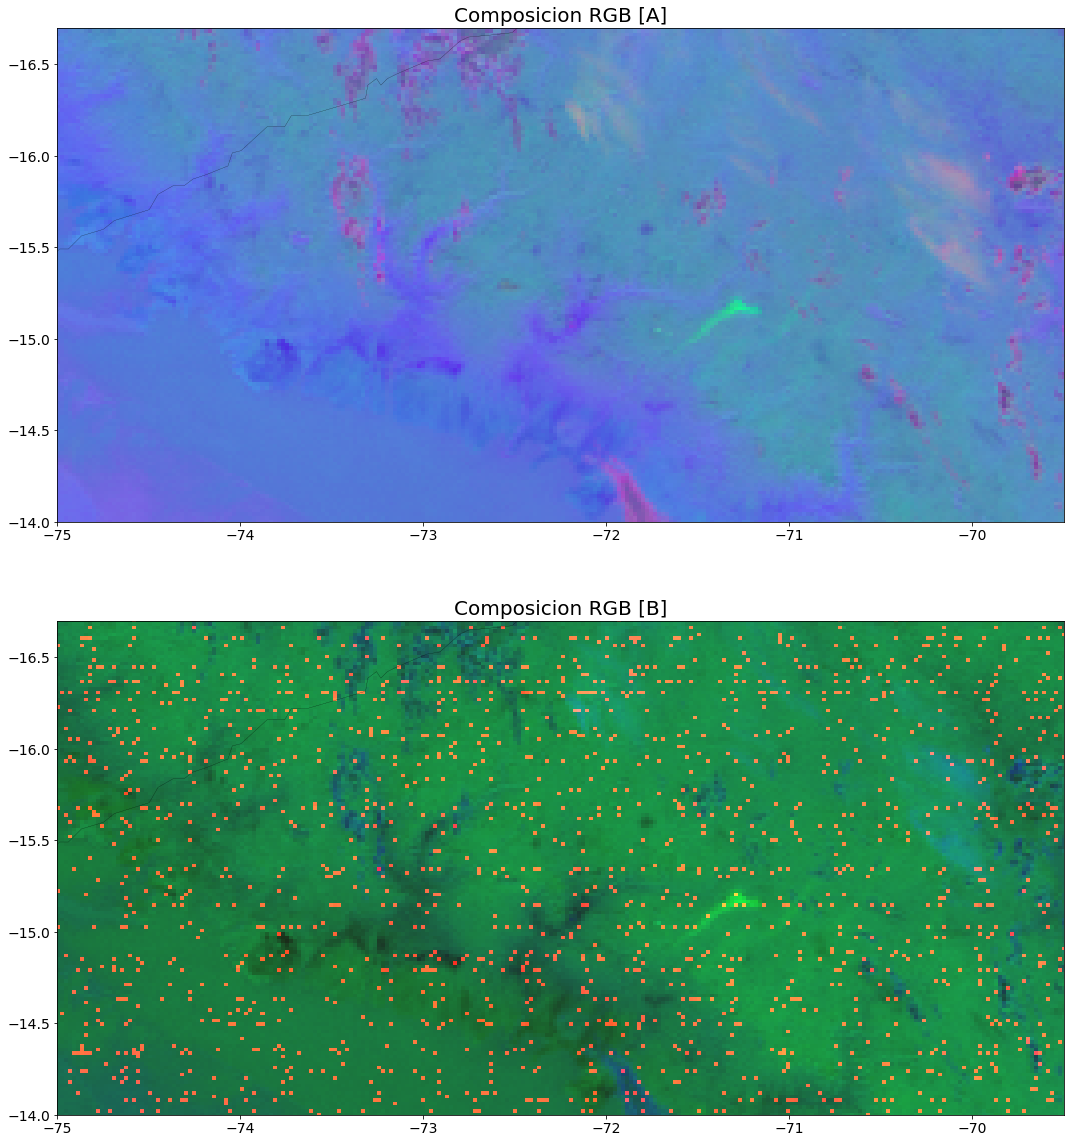

In [40]:

latn=-14
lats=-16.7
lonw=-75
lone=-69.5

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(211)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

extent = [lonsat.min(), lonsat.max(), latsat.min(), latsat.max()] # [left, right, bottom, top]

plt.imshow(RGB, extent=extent, alpha=0.9)

plt.axis([lonw, lone, latn, lats])

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1], color='Black', linewidth=0.2)

plt.title('Composicion RGB [A]', fontsize=20)


#############################
#RGB B
############################
ax1 = fig.add_subplot(212)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

extent = [lonsat.min(), lonsat.max(), latsat.min(), latsat.max()] # [left, right, bottom, top]

plt.imshow(R1G1B1, extent=extent, alpha=0.9)
plt.axis([lonw, lone, latn, lats])

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1], color='Black', linewidth=0.2)

plt.title('Composicion RGB [B]', fontsize=20)

plt.savefig('/home/martin/Escritorio/Casosdeestudiosensoramiento/RGB(0.45utc).png',dpi=100,transparent=False)



plt.show()

In [ ]:
# BTD Algebra de bandas: diferencia de canale

In [48]:

# Calculamos la diferencia entre el canales 
#Prata et al
BTD1 = Tb_13-Tb_15  #t10.3-t12.3 
BTD2 = Tb_16-Tb_12  #t13,3-t9,6 
BTD3=  Tb_12-Tb_16  #inverso a BTD2
BTD4 = Tb_11-Tb_13-2*Tb_15  #t8,3-t10.3-2*t12.3 
BTD5 = Tb_10-Tb_08   #t7,3-t6.2
BTD6 = Tb_13-Tb_11  #t10.3-t8,3
BTD7 = Tb_15-Tb_11 #t12.3-t8.3
BTD8 = Tb_16-Tb_10 #t13.3-t10 
#nota al 11micrones lo consideramos 10,3 porque nos basamos en las imagenes individuales de prata 

#Ellrod et al
BTD9 = Tb_13-Tb_15  #t10.3-t12.3 
BTD10 = Tb_07-Tb_13 #t3,9-t10.3
BTD11 = 60+ 10*((Tb_15-Tb_13)+ (Tb_07-Tb_13)) # composicion


# Ahora graficamos los resultados:
latn=-14
lats=-16.7
lonw=-75
lone=-69



aspect_ratio=1

fig = plt.figure(figsize=(17,11))

#==================================================================================================#
# BTD1 = Tb_13-Tb_15  #t10.3-t12.3 
#==================================================================================================#

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD1,cmap='seismic', vmin=-15,vmax=15)
cbar_labels = np.arange(-15.,15,3.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (10.3-12.3) $\mu$m ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD1SABA.png',dpi=100,transparent=False)

plt.close()

#==================================================================================================#
# BTD2 = Tb_16-Tb_12  #t13,3-t9,6 
#==================================================================================================#

fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD2,cmap='seismic', vmin=2,vmax=16)
cbar_labels = np.arange(2.,16.,2.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (13,3-9,6)$\mu$m  ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD2SABA.png',dpi=100,transparent=False)


plt.close()
#==================================================================================================#
# BTD3=  Tb_12-Tb_16  #inverso a BTD2
#==================================================================================================#


fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD3,cmap='seismic', vmin=-22,vmax=4)
cbar_labels = np.arange(-22.,4.,4.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (9,6-13.3) $\mu$m  ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD3SABA.png',dpi=100,transparent=False)


plt.close()
#==================================================================================================#
# BTD4 = Tb_11-Tb_13-2*Tb_15  #t8,3-t10.3-2*t12.3  
#==================================================================================================#

fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD4,cmap='seismic', vmin=-800,vmax=-250)
cbar_labels = np.arange(-600.,-250.0,50.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (8.3-10.3-2*12.3 )$\mu$m ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD4SABA.png',dpi=100,transparent=False)


plt.close()

#==================================================================================================#
# BTD5 = Tb_10-Tb_08   #t7,3-t6.2 
#==================================================================================================#

fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD5,cmap='seismic', vmin=0,vmax=40)
cbar_labels = np.arange(0.,40.,5.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (7.3-6.2)$\mu$m  ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD5SABA.png',dpi=100,transparent=False)



plt.close()
#==================================================================================================#
# BTD6 = Tb_13-Tb_11  #t10.3-t8.3
#==================================================================================================#

fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD6,cmap='seismic', vmin=-8,vmax=10)
cbar_labels = np.arange(-8.,10.,4.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (10.3-8.3)$\mu$m ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD6SABA.png',dpi=100,transparent=False)


plt.close()
#==================================================================================================#
# BTD7 = Tb_15-Tb_11 #t12.3-t8.3 
#==================================================================================================#

fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD7,cmap='seismic', vmin=-4, vmax=8)
cbar_labels = np.arange(-6.,6.,2.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (12.3-8.3)$\mu$m ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD7SABA.png',dpi=100,transparent=False)


plt.close()
#==================================================================================================#
# BTD8 = Tb_16-Tb_10 #t13.3-t10.3
#==================================================================================================#

fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD8,cmap='seismic', vmin=-8,vmax=32)
cbar_labels = np.arange(-8.,32.,4.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (13.3-10.3)$\mu$m ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD8SABA.png',dpi=100,transparent=False)


plt.close()
#==================================================================================================#
# BTD9 = Tb_13-Tb_15  #t10.3-t12.3 
#==================================================================================================#

fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD9,cmap='seismic', vmin=-15,vmax=15)
cbar_labels = np.arange(-15.,15.,5.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (10.3-12.3) $\mu$m TBSW ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD9SABA.png',dpi=100,transparent=False)


plt.close()
#==================================================================================================#
# BTD10 = Tb_07-Tb_13 #t3,9-t10.3
#==================================================================================================#

fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD10,cmap='seismic', vmin=-5,vmax=40)
cbar_labels = np.arange(-5.,40.,5.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD (3.9-10.3)$\mu$m  SLIR ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD10SABA.png',dpi=100,transparent=False)


plt.close()
#==================================================================================================#
#BTD11 = 60+ 10*((Tb_15-Tb_13)+ (Tb_07-Tb_13)) # composicion
#==================================================================================================#

fig = plt.figure(figsize=(17,11))

#ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,BTD11,cmap='seismic', vmin=50,vmax=300)
cbar_labels = np.arange(50.,300.,50.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels, shrink=0.6)
cbar.set_label('Temperatura de brillo [degC]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Black', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-16 BTD Composicion TVAP ', fontsize=18)

plt.savefig('/home/martin/Escritorio/Casosdeestudio/GOES16_BTD11SABA.png',dpi=100,transparent=False)



plt.close()

In [31]:

#el sabancaya lo obtengo en -15.7S  -72O

In [49]:



# Graficado de diagramas de dispersión (scatterplots)
#Prata et al
BTD1 = Tb_13-Tb_15  #t10.3-t12.3 
BTD2 = Tb_16-Tb_12  #t13,3-t9,6 
BTD3=  Tb_12-Tb_16  #inverso a BTD2
BTD4 = (Tb_11-273)-(Tb_13-273)-2*(Tb_15-273)  #t8,3-t10.3-2*t12.3 
BTD5 = Tb_10-Tb_08   #t7,3-t6.2
BTD6 = Tb_13-Tb_11  #t10.3-t8,3
BTD7 = Tb_15-Tb_11 #t12.3-t8.3
BTD8 = Tb_16-Tb_10 #t13.3-t10 
#nota al 11micrones lo consideramos 10,3 porque nos basamos en las imagenes individuales de prata 

#Ellrod et al
BTD9 = Tb_13-Tb_15  #t10.3-t12.3 
BTD10 = Tb_07-Tb_13 #t3,9-t10.3
BTD11 = 60+ 10*((Tb_15-Tb_13)+ (Tb_07-Tb_13)) # composicion


# Ahora graficamos los resultados:

# Definimos los limites del area a visualizar
latn=-14
lats=-16.7
lonw=-74
lone=-69.5


# Graficado de diagramas de dispersión (scatterplots)
#==================================================================================================#
# BTD1 = Tb_13-Tb_15  #t10.3-t12.3 
#==================================================================================================#

fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD1,Tb_13-273, color='b', marker='o', alpha=0.5)

plt.xlim([-50, 30])
plt.ylim([-50, 30])

plt.xlabel('BTD (10.3-12.3)$\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 10.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-50, 30), (-50, 30), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD1,Tb_15-273 ,color='b', marker='o', alpha=0.5)

plt.xlim([-50, 30])
plt.ylim([-50, 30])

plt.xlabel('BTD (10.3-12.3)$\mu$m  [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 12.3 $\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-50, 30), (-50, 30), linewidth=1.0, color='k', linestyle='--')

plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot1.png',dpi=100,transparent=False)


plt.close()



#==================================================================================================#
# #BTD2 = Tb_16-Tb_12  #t13,3-t9,6 
#==================================================================================================#

fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD2,Tb_16-273, color='b', marker='o', alpha=0.5)

plt.xlim([-50, 30])
plt.ylim([-50, 30])

plt.xlabel('BTD (13.3-9.6)$\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 13.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-50, 30), (-50, 30), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD2,Tb_12-273, color='b', marker='o', alpha=0.5)

plt.xlim([-50, 30])
plt.ylim([-50, 30])

plt.xlabel('BTD (13.3-9.6))$\mu$m  [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 9.6 $\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-50, 30), (-50, 30), linewidth=1.0, color='k', linestyle='--')

plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot2.png',dpi=100,transparent=False)


plt.close()



#==================================================================================================#
# #BTD3=  Tb_12-Tb_16  #inverso a BTD2 #t9,6 -t13,3
#==================================================================================================#

fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD3,Tb_12-273, color='b', marker='o', alpha=0.5)

plt.xlim([-50, 30])
plt.ylim([-50, 30])

plt.xlabel('BTD (9.6-13.3)$\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 9.6$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-50, 30), (-50, 30), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD3,Tb_16-273 ,color='b', marker='o', alpha=0.5)

plt.xlim([-50, 30])
plt.ylim([-50, 30])

plt.xlabel('BTD (9.6-13.3))$\mu$m  [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 13.3 $\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-50, 30), (-50, 30), linewidth=1.0, color='k', linestyle='--')

plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot3.png',dpi=100,transparent=False)


plt.close()


#==================================================================================================#
# #BTD4 = (Tb_11-273)-(Tb_13-273)-2*(Tb_15-273)  #t8,3-t10.3-2*t12.3 
#==================================================================================================#

fig = plt.figure(figsize=(15, 7))
#solo lo hago para 8.3 porque aislo el efecto del SO2
#=============================================================================================#

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD4,Tb_11-273, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (8,3-10.3-2*12.3)$\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 8.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')


plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot4.png',dpi=100,transparent=False)
plt.close()

#==================================================================================================#
# #BTD5 = Tb_10-Tb_08   #t7,3-t6.2
#==================================================================================================#
fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD5,Tb_10-273, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (7,3-6.2)$\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 7.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD5,Tb_08-273 ,color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (7,3-6.2)$\mu$m  [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 6.2$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot5.png',dpi=100,transparent=False)

plt.close()


#==================================================================================================#
# #BTD6 = Tb_13-Tb_11  #t10.3-t8,3
#==================================================================================================#
fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD6,Tb_13-273, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (10.3-8,3)$\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 10.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD6,Tb_11-273, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (10.3-8.3)$\mu$m  [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 8.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot6.png',dpi=100,transparent=False)

plt.close()


#==================================================================================================#
# #BTD7 = Tb_15-Tb_11 #t12.3-t8.3
#==================================================================================================#
fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD7,Tb_15-273, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (12.3-8.3)$\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 12.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD7,Tb_11-273 ,color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (12.3-8.3)$\mu$m  [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 8.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot7.png',dpi=100,transparent=False)

plt.close()


#==================================================================================================#
# #BTD8 = Tb_16-Tb_10 #t13.3-t10.3
#==================================================================================================#
fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD8,Tb_16-273, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (13.3-10.3)$\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 13.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD8,Tb_10-273, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (13.3-10.3)$\mu$m  [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 10.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot8.png',dpi=100,transparent=False)

plt.close()


#==================================================================================================#
# #BTD9 = Tb_13-Tb_15  #t10.3-t12.3 
#==================================================================================================#
fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD9,Tb_13-273, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (10.3-12.3) $\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 10.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD9,Tb_15-273 ,color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (10.3-12.3)$\mu$m  [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 12.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot9.png',dpi=100,transparent=False)

plt.close()


#==================================================================================================#
# #BTD10 = Tb_07-Tb_13 #t3,9-t10.3
#==================================================================================================#
fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD10,Tb_07-273, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (3,9-10.3)$\mu$m   [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 3.9 $\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(BTD10,Tb_13-273 ,color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (3,9-10.3)$\mu$m  [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo 10.3$\mu$m  [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')

plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot10.png',dpi=100,transparent=False)

plt.close()


#==================================================================================================#
# #BTD11 = 60+ 10*((Tb_15-Tb_13)+ (Tb_07-Tb_13)) # composicion
#t12.3-t10.3   t3.9-t10.3
#==================================================================================================#

fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter(Tb_15-Tb_13,Tb_07-Tb_13, color='b', marker='o', alpha=0.5)

plt.xlim([-40, 40])
plt.ylim([-40, 40])

plt.xlabel('BTD (12.3-10.3)$\mu$m   [degC]',fontsize=13)
plt.ylabel('BTD (3.9-10.3)$\mu$m [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-40, 40), (-40, 40), linewidth=1.0, color='k', linestyle='--')
plt.savefig('/home/martin/Escritorio/Casosdeestudio/scatterplot11.png',dpi=100,transparent=False)

plt.close()